In [ ]:
import sys, importlib
importlib.reload(sys.modules['initialize_functions'])
importlib.reload(sys.modules['request_functions'])
#importlib.reload(sys.modules['firebase_functions'])

In [2]:
import json
from datetime import datetime

from initialize_functions import *
import initialize_functions as init_fun

from request_functions import *
import request_functions as req_fun

from firebase_functions import *
import firebase_functions as fb_fun

In [3]:
def getSpotsName():
    parking_spots = json.loads(listParkingSpots())
    parking_spot_list = []
    for spot in parking_spots:
        parking_spot_list.append(spot["id"])
    return parking_spot_list

In [12]:
def alter_parking_spot_info(spot_id, plate_number):
    
    #resgata a placa identificada na última revisão (None caso estivesse vazia na última verificação)     
    try:
        last_plate = json.loads(checkSpot(spot_id))["plate"]["plateNumber"]
    except:
        last_plate = None
        
    #caso a placa anterios seja igual a placa atual, não faz nada    
    if last_plate == plate_number:
        print("NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA")
        print("ATUAL: {} - ANTERIOR: {}".format(plate_number, last_plate))
        return
    
    #caso não seja identificada uma placa, altera status da vaga para disponível 
    if not plate_number:
        setParkingSpotStatusAvailable(spot_id)
        print("A VAGA ESTÁ LIVRE AGORA")
        print("ATUAL: {} - ANTERIOR: {}".format(plate_number, last_plate))
        return
        
    #caso seja identificada uma placa, altera status da vaga para ocupada, e atribui número da placa a vaga
    if plate_number:
        setParkingSpotStatusUnavailable(spot_id, plate_number)
        print("A VAGA ESTÁ OCUPADA AGORA")
        print("ATUAL: {} - ANTERIOR: {}".format(plate_number, last_plate))
        return

In [13]:
parking_spot_list = ["1", "2"]#getSpotsName()

while True:
    for spot in parking_spot_list:
        print("="*100)
        print("VERIFICANDO VAGA {}:".format(spot))
        
        #resgata imagem do firebase
        spot_image = get_image("parking_spots", spot)

        #caso não seja identificada uma imagem no firebase o sistema pula as outras verificações e passa para a próxima vaga
        if not spot_image:
            print("SEM IMAGEM NO SISTEMA")
            continue

        #seguimenta a placa
        prepared_IMG = prepareIMG(spot_image)

        #aplica ocr
        ocr_res = ocr(prepared_IMG[0], prepared_IMG[1], 0.2, 52)

        #formata resultado do ocr
        plate_number = format_ocr(ocr_res)

        #seta status da vaga
        alter_parking_spot_info(spot, plate_number)

VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFICANDO VAGA 2:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: None - ANTERIOR: None
VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFICANDO VAGA 2:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: None - ANTERIOR: None
VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFICANDO VAGA 2:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: None - ANTERIOR: None
VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFICANDO VAGA 2:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: None - ANTERIOR: None
VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFICANDO VAGA 2:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: None - ANTERIOR: None
VERIFICANDO VAGA 1:
NÃO HOUVE MUDANÇA NA OCUPAÇÃO DA VAGA
ATUAL: FBY2860 - ANTERIOR: FBY2860
VERIFIC

KeyboardInterrupt: 

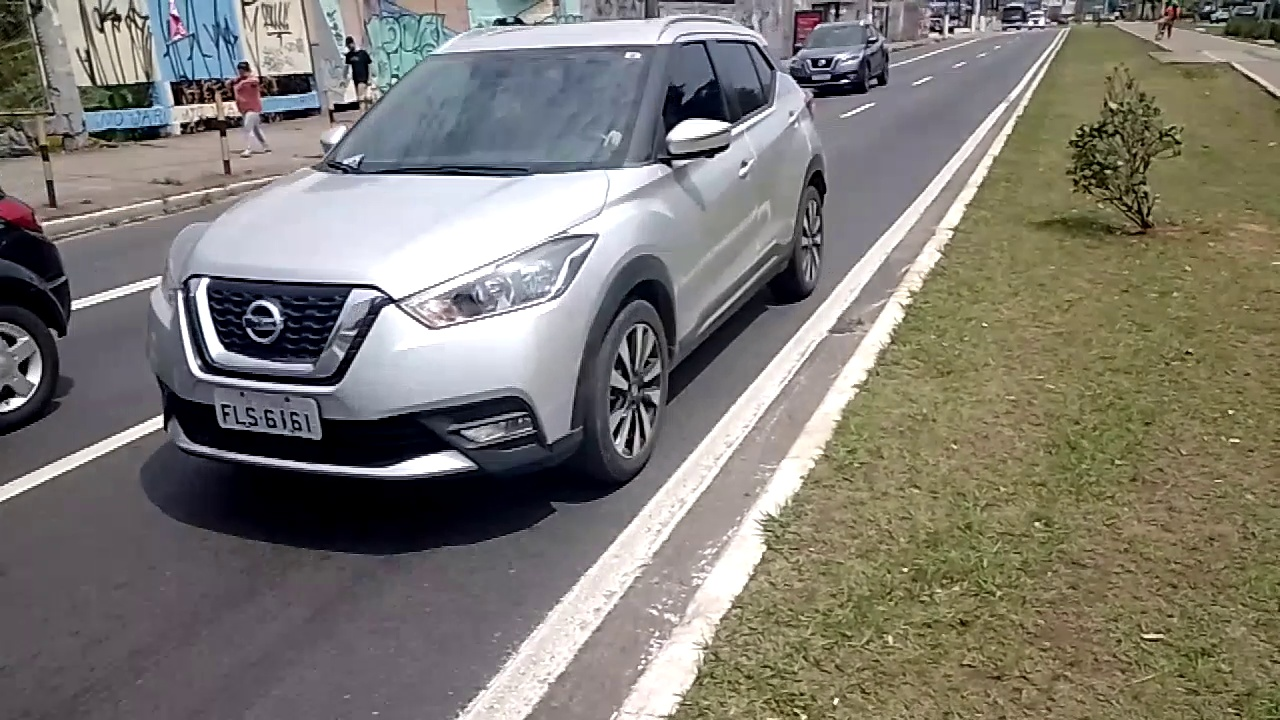

In [19]:
spot_image = get_image("parking_spots", 2)
spot_image

In [20]:
prepared_IMG = prepareIMG(spot_image)
prepared_IMG

(array([[[ 53,  58,  38],
         [ 53,  58,  38],
         [ 54,  57,  38],
         ...,
         [ 47,  59,  59],
         [ 77,  89,  89],
         [109, 121, 121]],
 
        [[ 57,  62,  42],
         [ 55,  60,  40],
         [ 58,  61,  42],
         ...,
         [ 31,  43,  43],
         [ 63,  75,  75],
         [ 94, 106, 106]],
 
        [[ 65,  68,  49],
         [ 63,  66,  47],
         [ 69,  72,  51],
         ...,
         [ 25,  35,  36],
         [ 51,  61,  62],
         [ 76,  86,  87]],
 
        ...,
 
        [[ 82,  76,  80],
         [ 82,  76,  80],
         [ 82,  76,  80],
         ...,
         [123, 125,  85],
         [113, 115,  75],
         [115, 117,  77]],
 
        [[ 81,  75,  79],
         [ 82,  76,  80],
         [ 82,  76,  80],
         ...,
         [ 58,  58,  20],
         [ 38,  38,   0],
         [ 37,  37,   0]],
 
        [[ 81,  75,  79],
         [ 82,  76,  80],
         [ 82,  76,  80],
         ...,
         [ 41,  41,   3],
  

In [21]:
ocr_res = ocr(prepared_IMG[0], prepared_IMG[1], 0.2, 52)
ocr_res

['FLS616']

In [22]:
plate_number = format_ocr(ocr_res)
plate_number